### Objectives of this notebook:
- display output from ABRM
- perform analysis on output. eg. feature importance and model selection
- in console do: jupyter nbconvert --to="python" '.\Postprocessing.ipynb'
- this will upload the file in pure python format

In [1]:
import numpy as np

import pandas as pd
import plotly.io as pio
from training_images.TI_selection import TI_selection
pio.renderers.default = "browser"


### Import data
- one df with FD performance of each particle  
- one df with associated particle position  
- one dicct with initial setup that would allow reproduction of results

In [2]:
setup = 1
dataset = "2020_11_20_16_03"


TI_data = TI_selection(setup = setup, dataset = dataset)
# data.read_data()
TI_data.df_TI_props

,TI_no,P32,P32_random,P32_area_specific,n_fracsets_random,n_fracsets_area_specific,seed_random_0,P32_random_0,frac_length_shape_random_0,frac_length_scale_random_0,...,frac_orient_azimuth_area_specific_2,frac_orient_concentration_area_specific_2,seed_area_specific_3,P32_area_specific_3,frac_length_shape_area_specific_3,frac_length_scale_area_specific_3,frac_length_max_area_specific_3,frac_orient_dip_area_specific_3,frac_orient_azimuth_area_specific_3,frac_orient_concentration_area_specific_3
0,0,0.31429,0.16972,0.14457,2.0,2.0,2305.1,0.08486,3.0,20.1,...,40.5,13.1,84321.9,0.0001,2.2,16.0,102.7,80.2,48.0,30.2
1,1,0.97902,0.31329,0.66573,3.0,1.0,79575.8,0.10443,2.5,24.7,...,46.5,18.6,79324.0,0.0001,2.2,20.3,443.0,70.2,26.7,25.1
2,2,0.52851,0.19026,0.33825,3.0,2.0,84509.7,0.06342,2.7,22.1,...,35.4,33.8,91922.8,0.0001,2.6,18.9,361.0,58.4,49.9,12.5
3,3,0.52722,0.18980,0.33742,1.0,1.0,52093.8,0.18980,2.1,17.7,...,28.2,48.6,92968.0,0.0001,2.4,22.4,164.7,64.7,31.9,40.6
4,4,0.41781,0.20055,0.21726,3.0,3.0,47554.2,0.06685,2.5,19.6,...,32.7,10.5,23428.2,0.0001,2.1,15.1,417.9,82.0,42.1,46.5
5,5,0.62397,0.38686,0.23711,2.0,1.0,23954.9,0.19343,2.1,17.7,...,44.9,34.7,33395.9,0.0001,2.1,22.0,161.6,79.3,40.2,42.4


In [3]:
TI_data.plot_best_model(property ="PERMX")

Plotting Training Image 3
[Geometry] Converting GRDECL to Paraview Hexahedron mesh data....
     NumOfPoints 28800
     NumOfCells 3600
     .....Done!
[Output] Writing "GRDECL_file_reader/Results\GRID.vtu" Paraview file....Done!
[Output] Writing "GRDECL_file_reader/Results\GRID.vtu" Paraview file....Done!
[Output] Writing "GRDECL_file_reader/Results\GRID.vtp" VTP file..vtp file created.


C:\Users\bs48\AppData\Local\Continuum\anaconda_3\envs\ABRM\lib\site-packages\pyvista\plotting\plotting.py:3909: UserWarning:

`auto_close` ignored: by clicking the exit button, you have destroyed the render window and we have to close it out.



In [4]:
TI_data.clustering_tof_or_TI_props(n_neighbors = 2,cluster_parameter = "tof")

C:\Users\bs48\AppData\Local\Continuum\anaconda_3\envs\ABRM\lib\site-packages\numba\np\ufunc\parallel.py:355: NumbaWarning:

The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 11000. The TBB threading layer is disabled.



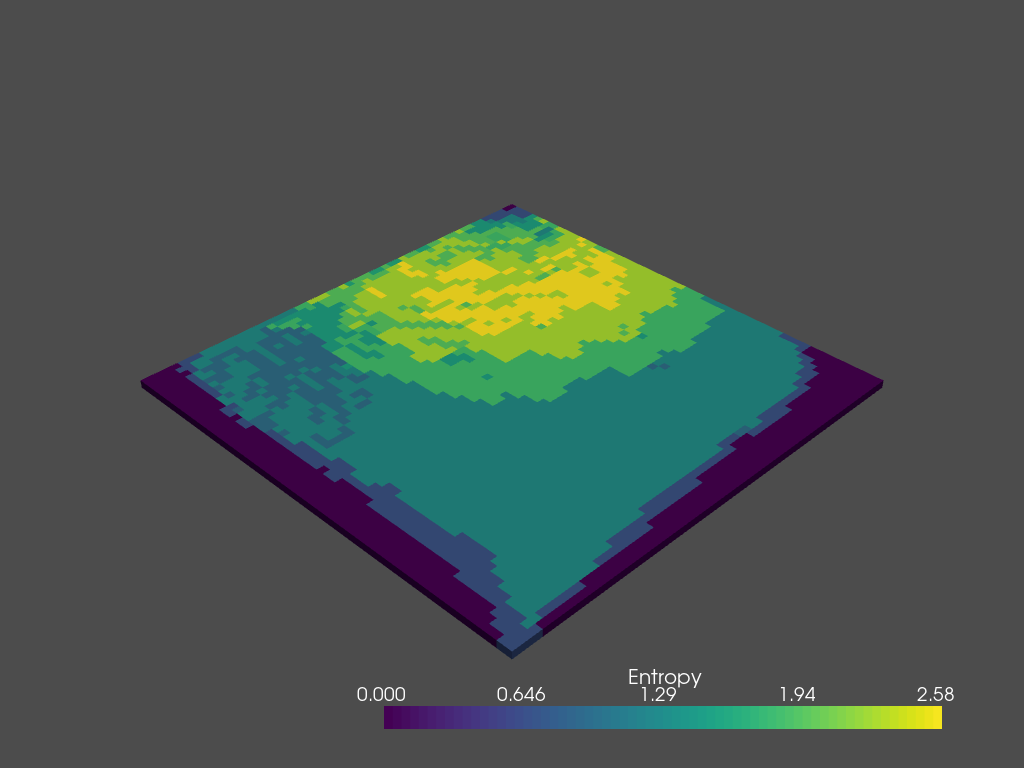

In [5]:
TI_data.plot_tof_entropy()

In [5]:
TI_data.cluster_TI_selection()

In [6]:
TI_data.save_best_clustered_TIs()

Path C:\AgentBased_RM\ABRM_functions\training_images\..\..\Output\training_images\TI_1\2020_11_20_16_03\


### Histogram Paramters

In [ ]:
pio.renderers.default = "browser"
data.plot_hist(misfit_tolerance= False)

### Histograms for best models parameters

In [ ]:
data.plot_hist()

### Boxplots parameters
explore if ranges of parameters need potential modifications

In [ ]:
data.plot_box()

### Grid distribution of time of flight and entropy based on time of flight of best models

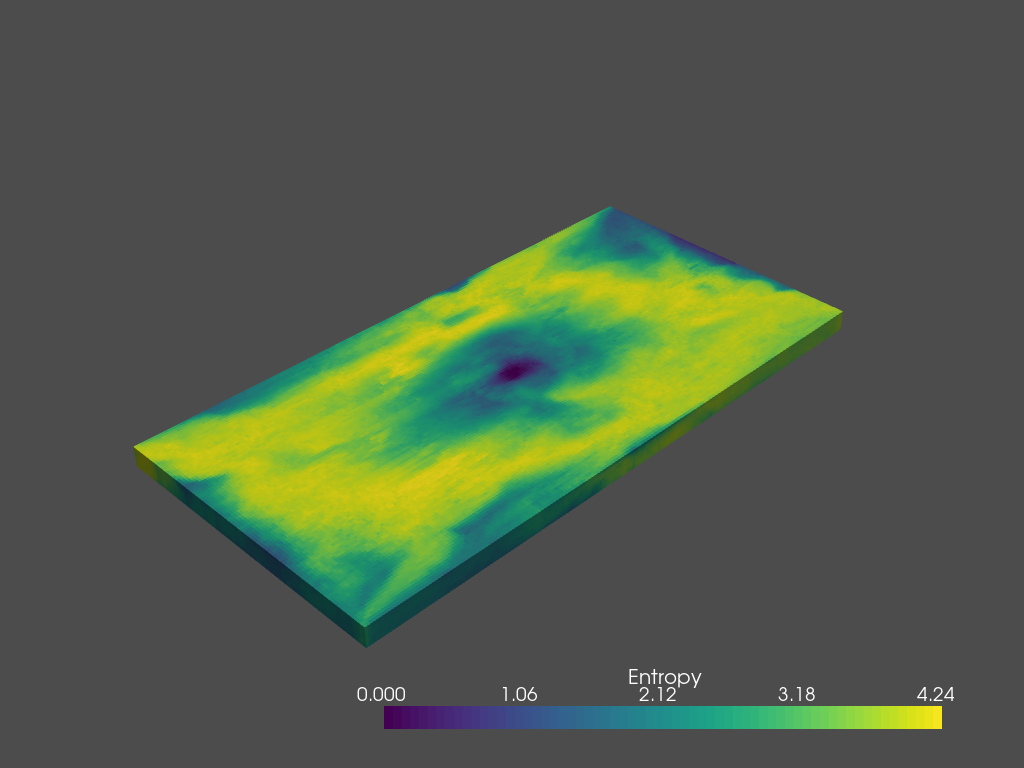

In [74]:
data.plot_tof_entropy()

In [ ]:
data.plot_tof_best_models()

### Plot one of the best models

Plotting Model 271


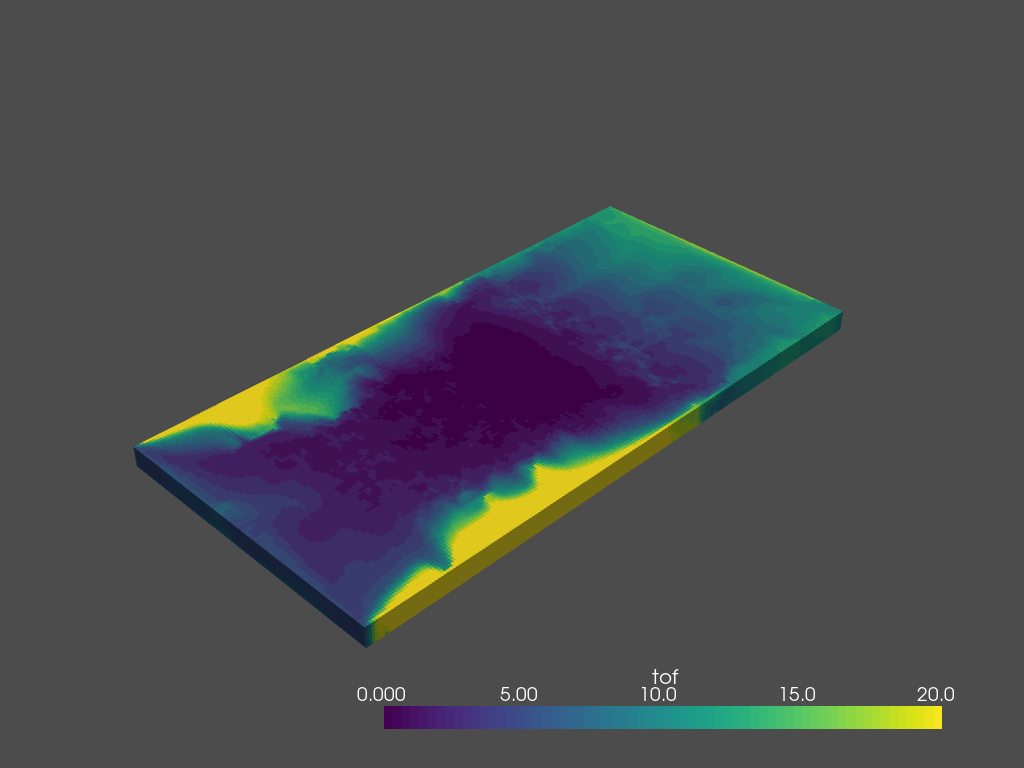

In [86]:
data.plot_best_model(random_model = True,model_id = 622,property = "tof")

### Cluster best models with UMAP and HDBSCAN

In [90]:
data.clustering_tof_or_PSO(n_neighbors = 10,min_dist = 0,n_components = 30, min_cluster_size = 5,
                              min_samples = 1,allow_single_cluster = True,cluster_parameter = "tof")

In [ ]:
data.clustering_sweep_efficiency_or_F_Phi(cluster_parameter="F_Phi")

### Selection of models to save

In [94]:
data.cluster_model_selection(include_unclustered= False,cluster_parameter = "tof",n_reservoir_models=15)


### Save selected models, ready for flow simulation

In [95]:
data.save_best_clustered_models()


In [29]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
i = 12
delta = 5
iterations = np.array(np.arange(i-delta,i))
entropy = []
for i in range(delta):
    entropy.append(np.array(data.df_position[(data.df_position.iteration ==iterations[i]) & (data.df_position.particle_no ==0)].tof_based_entropy_best_models))


In [48]:
misfit = data.df_position.misfit

In [56]:
ent_models =[317605,374212.500225,397969.344835,418713.795384,432242.807376,441541.512703,452472.094125,461302.70325,467026.397473,
            470998.2807854,474755.556403,476964.310781,478540.323241,479310.425691,480482.578145,481295.341105,481628.051183,
            481581.865309,481059.955903,480589.103324,479972.505261,480576.041386,481369.56593,482361.081191,483527.658786,
            484809.617757,485172.560929,485470.058127,485581.003449,485489.536516,484499.711129,483074.032361,482649.570432,482172.488973,
            481794.440863,481617.643701]

In [59]:
fig = make_subplots(rows = 1, cols = 1)



fig.add_trace(go.Scatter(y = ent_models,
                        mode='markers',
#                         text = self.df_best_position.index,
                        marker=dict(
                                    size=10,
#                                     color=self.df_best_position[cluster], #set color equal to a variable
#                                     colorscale= "deep",#'Viridis', # one of plotly colorscales
#                                     showscale=True,
#                                     colorbar=dict(title="Clusters")
                                    )
                        ))
# fig.add_trace(go.Scatter(x = self.df_best_models_to_save[cluster_x],
#                          y = self.df_best_models_to_save[cluster_y],
#                          mode='markers',
#                          text = self.df_best_position.index,
#                          marker = dict(
#                                         size = 14,
#                                         color = 0,
#                                       )
#                         ))

fig.update_layout(showlegend=False)
fig.update_layout(title='Entropy')
fig.update_xaxes(title_text = "Iterations",row = 1, col = 1)
fig.update_yaxes(title_text = "Entropy",row = 1, col = 1)
fig.show()

In [ ]:
fig = make_subplots(rows = 1, cols = 1)



fig.add_trace(go.Scatter(y = misfit,
                        mode='markers',
#                         text = self.df_best_position.index,
                        marker=dict(
                                    size=5,
#                                     color=self.df_best_position[cluster], #set color equal to a variable
#                                     colorscale= "deep",#'Viridis', # one of plotly colorscales
#                                     showscale=True,
#                                     colorbar=dict(title="Clusters")
                                    )
                        ))
# fig.add_trace(go.Scatter(x = self.df_best_models_to_save[cluster_x],
#                          y = self.df_best_models_to_save[cluster_y],
#                          mode='markers',
#                          text = self.df_best_position.index,
#                          marker = dict(
#                                         size = 14,
#                                         color = 0,
#                                       )
#                         ))

fig.update_layout(showlegend=False)
fig.update_layout(title='Misfit')
fig.update_xaxes(title_text = "particles",row = 1, col = 1)
fig.update_yaxes(title_text = "RMSE",row = 1, col = 1)
fig.show()

In [ ]:
data.df_performance[data.df_performance ==particles[0]].LC.unique()

In [ ]:
nested_dict = { '0': {'key_1': 'value_1'},
                '1': {'key_2': 'value_2'}}

In [ ]:
nested_dict["0"]["key_1"]

In [ ]:
iterations = data.df_position["iteration"].unique().tolist()
entropy = []
for i in range(len(iterations)):
    entropy.append(np.array(data.df_position[(data.df_position.iteration ==iterations[i]) & (data.df_position.particle_no ==0)].tof_based_entropy_best_models))


In [ ]:
linear_regressor = LinearRegression()
coefficient = []
delta = 5
# entropy = entropy[0:2]
if len(entropy)< delta:
    pass
else:
    for i in range(len(entropy)-delta):
        Y = entropy[i:i+delta]
        X = np.arange(i,i+delta).reshape(-1,1)
        linear_regressor.fit(X,Y)
        Y_pred = linear_regressor.predict(X)
        plt.plot(X,Y_pred)
        coefficient.append(linear_regressor.coef_)
        if coefficient[i] < 0:
            print("reset PSO and pbest {}".format(i))
    plt.plot(X,Y)
    plt.xlabel("iteration")
    plt.ylabel("entropy")
    plt.ylim(0)
    plt.title("Entropy slope last 5 points")

In [ ]:
plt.plot(entropy,".")
plt.xlabel("iteration")
plt.ylabel("entropy")

In [ ]:
entropy.append(entropy)

In [ ]:
plt.plot(coefficient)
# plt.ylim(-1000,0)


In [ ]:
from scipy import interpolate
from scipy.signal import find_peaks
from sklearn.linear_model import LinearRegression

entropy = np.array(data.df_position.tof_based_entropy_best_models.unique())
iteration = np.array(np.linspace(0,25,26))
# iteration = np.array(np.linspace(0,10,10))
# iteration = interpolate.splrep(iteration,entropy, s = 0)
entropy_first_derr = np.gradient(entropy,iteration)


In [ ]:
entropy_first_derr

In [ ]:
plt.plot(data.df_position.tof_based_entropy_best_models.unique())
plt.plot(entropy_first_derr)
plt.ylim([300000,400000])
# can see that after 10 iteration there is no improvvement for the tof entropy anymore
# and I think that all following models just converge towards a couple of best solutions.
# what to do: "restart" ie redistribute particles again and dont give them any prior knowledge?
# check every 10 iterations what gradient is. if its not moving --> move models around and reset global bests_

In [ ]:
a = []
std = []
for i in range(len(entropy)-5):
    a.append(np.mean(entropy[i:i+5]))
    std.append(np.std(entropy[i:i+5]))


In [ ]:
plt.plot(entropy)
plt.plot(a)
# plt.plot(np.sign(np.diff(entropy)))

In [ ]:
peaks,_ = find_peaks(np.diff(entropy),height =0)
plt.plot(np.diff(entropy))
plt.plot(peaks,np.diff(entropy([peaks])))

In [ ]:
def zero_slope(data, chunksize =4, max_slope = .5):
    midindex = chunksize // 2
    is_plateau = np.zeros((data.shape[0]))
    for index in range(midindex, len(data) - midindex):
        chunk = data[index - midindex : index + midindex]
        # subtract the endpoints of the chunk
        # if not sufficient, maybe use a linear fit
        dy_dx = abs(chunk[0] - chunk[-1])/chunksize
        print(dy, dx, dy / dx)
        if (0 <= dy / dx < max_slope):
            is_plateau[index] = 1.0
    return is_plateau

In [ ]:
entropy = np.array(entropy)
chunksize = 4
midindex = chunksize // 2
is_plateau = np.zeros((entropy.shape[0]))
for index in range(midindex, len(entropy) - midindex):
    chunk = entropy[index - midindex : index + midindex]
    # subtract the endpoints of the chunk
    # if not sufficient, maybe use a linear fit
    dy,dx = abs(chunk[0] - chunk[-1])/chunksize
    print(dy, dx, dy / dx)
    if (0 <= dy / dx < max_slope):
        is_plateau[index] = 1.0

In [ ]:
x = np.arange(0,len(entropy))

# Tests

In [ ]:
F_points_target = np.array([0, 0.25, 0.45, 0.6, 0.7, 0.8, 0.90, 0.95, 0.97, 0.99, 1])
plt.plot(F_points_target)

In [26]:
import pyvista as pv
from pyentrp import entropy as ent
from skimage.util.shape import view_as_windows
from sklearn import preprocessing 
import hdbscan
import umap
import matplotlib. pyplot as plt
from GRDECL_file_reader.GRDECL2VTK import *


In [ ]:
Model = GeologyModel(filename = "C:/AgentBased_RM/FD_Models/INCLUDE/GRID.GRDECL")
TempData=Model.LoadCellData(varname="PORO",filename='C:/AgentBased_RM/Output/2020_08_25_11_25/best_models/INCLUDE/PORO/M0.GRDECL')

### Feature importance - model explainability

In [ ]:
import shap
from sklearn.ensemble import RandomForestRegressor


In [ ]:
data.setup_all["2020_09_14_17_35"]["columns"]

In [ ]:
columns = data.setup_all["2020_09_14_17_35"]["columns"]
X_train = data.df_position[columns]
Y_train = data.df_position.LC

In [ ]:
# load JS visualization code to notebook
shap.initjs()

In [ ]:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, Y_train)

In [ ]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [ ]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[80,:], X_train.iloc[80,:])

In [ ]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X_train)

In [ ]:
# create a dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("MatrixpermY", shap_values, X_train)

In [ ]:
shap.summary_plot(shap_values, X_train)
